# **About the Project**
This project involves fine-tuning a GPT-2 model on a mental health FAQ dataset to generate text related to mental health questions and answers. The fine-tuning process adapts the model to better understand and respond to queries in the domain of mental health.[link text](https://)



## **Installation**
To run this script, you need to install the necessary Python packages

In [7]:
# install both transformers and PyTorch
!pip install transformers[torch] -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00


## **`Load and Prepare Dataset`**
The dataset used for fine-tuning is a collection of frequently asked questions (FAQs) about mental health. The script preprocesses this data by expanding abbreviations, converting text to lowercase, and removing HTML tags. Then, it combines questions and answers.

In [2]:
import pandas as pd
import re
from transformers import GPT2Tokenizer, GPT2LMHeadModel, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# Load dataset
df = pd.read_csv('/content/Mental_Health_FAQ.csv')

# Define a dictionary for expanding abbreviations and acronyms
abbreviations = {
    "GP": "General Practitioner",
    "COVID": "Coronavirus Disease",
    "WHO": "World Health Organization",
    "BCCDC": "British Columbia Centre for Disease Control",
    "BC": "British Columbia",
    "UK": "United Kingdom",
    "MSP": "Medical Services Plan or Medicare Secondary Payer",
    "PPMB": "Persons with Persistent and Multiple Barriers",
    "PWD": "Person With Disabilities",
    "CBT": "Cognitive Behavioral Therapy",
    "DBT": "Dialectical Behavior Therapy",
    "CMHA": "Canadian Mental Health Association",
    "LGBT": "Lesbian, Gay, Bisexual, and Transgender",
    "CARBC": "Centre for Addictions Research of British Columbia",
    "PDD": "Pervasive Developmental Disorder",
    "BPD": "Borderline Personality Disorder",
    "SPD": "Sensory Processing Disorder",
    "ASPD": "Antisocial Personality Disorder",
    "OCPD": "Obsessive-Compulsive Personality Disorder",
    "OCD": "Obsessive-Compulsive Disorder",
    "BED": "Binge Eating Disorder",
    "DID": "Dissociative Identity Disorder",
    "CHADD": "Children and Adults with Attention-Deficit/Hyperactivity Disorder",
    "CADDRA": "Canadian ADHD Resource Alliance",
    "ADHD": "Attention Deficit Hyperactivity Disorder",
    "THC": "Tetrahydrocannabinol",
    "CBD": "Cannabidiol",
    "FDA": "Food and Drug Administration"
}

# Define a preprocessing function
def preprocess_text(text):
    # Normalize text to lowercase
    text = text.lower()

    # Expand abbreviations and acronyms based on the dictionary
    for abbr, expanded in abbreviations.items():
        text = text.replace(abbr.lower(), expanded.lower())

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    return text

df['Questions'] = df['Questions'].apply(preprocess_text)
df['Answers'] = df['Answers'].apply(preprocess_text)

# Combine questions and answers into a single string per row
df['combined'] = 'Question: ' + df['Questions'] + ' Answer: ' + df['Answers']

# Save the preprocessed data to a new text file
df['combined'].to_csv('formatted_dataset.txt', header=False, index=False)

# Define a preprocessing function
def tokenize_function(examples):
    # Ensure that the `pad_token` is set
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    # Tokenize the texts and return the result
    return tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)


# Prepare the tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Add special tokens
special_terms = ['bipolar disorder', 'cognitive behavioral therapy', 'post-traumatic stress disorder']
tokenizer.add_tokens(special_terms)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


3

# **`Fine-Tune Model`**
The script employs a K-Fold Cross-Validation approach to fine-tune the GPT-2 model, ensuring robustness. Special tokens relevant to the mental health domain are added to the tokenizer, and the model is trained with custom training arguments to optimize performance.



Fold 1/2


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/282 [00:00<?, ? examples/s]

Map:   0%|          | 0/318 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,3.385800,3.463732
2,2.806100,3.312579
3,2.745300,3.254302


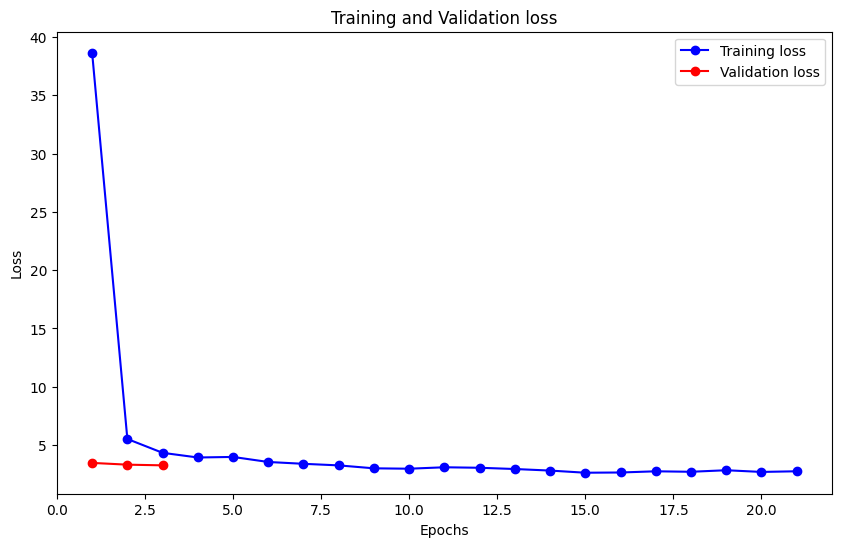

Evaluation results for fold 1: {'eval_loss': 3.2543015480041504, 'eval_runtime': 55.3983, 'eval_samples_per_second': 5.74, 'eval_steps_per_second': 0.722, 'epoch': 3.0}
Fold 2/2


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Map:   0%|          | 0/318 [00:00<?, ? examples/s]

Map:   0%|          | 0/282 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,3.416400,3.339453
2,2.930300,3.099231
3,2.833500,3.074516


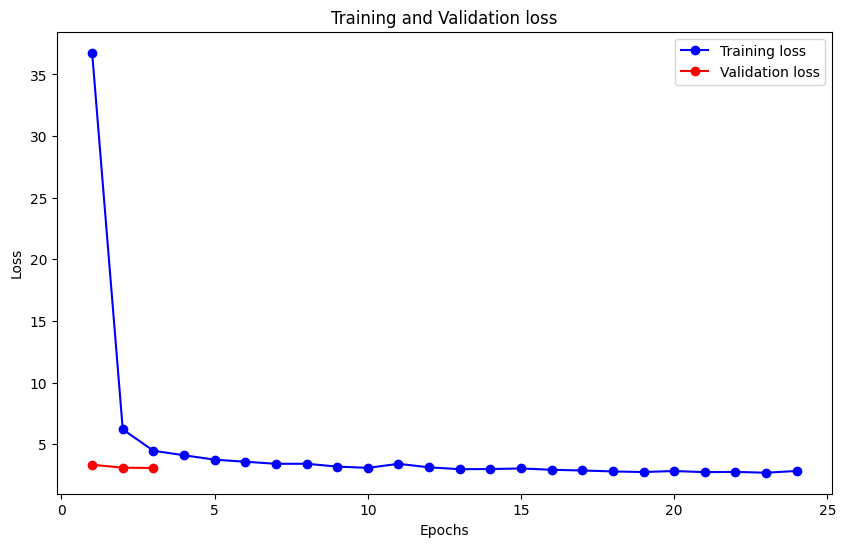

Evaluation results for fold 2: {'eval_loss': 3.0745158195495605, 'eval_runtime': 74.1556, 'eval_samples_per_second': 3.803, 'eval_steps_per_second': 0.485, 'epoch': 3.0}


In [3]:
from sklearn.model_selection import KFold
import numpy as np
import datasets
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset
from accelerate import Accelerator, DataLoaderConfiguration

# Initialize lists to store evaluation results for each fold
eval_results = []

# K-Fold Cross-validation setup
k = 2
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Loop through each fold
for fold, (train_idx, val_idx) in enumerate(kf.split(df)):
    print(f'Fold {fold+1}/{k}')

    # Splitting the data
    train_data = df.iloc[train_idx]
    val_data = df.iloc[val_idx]

    # Save the train and validation data to temporary files
    train_data['combined'].to_csv(f'train_fold_{fold}.txt', header=False, index=False)
    val_data['combined'].to_csv(f'val_fold_{fold}.txt', header=False, index=False)

    # Initialize the model for each fold
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    model.resize_token_embeddings(len(tokenizer))

    # Create the training and validation datasets
    # Load datasets
    train_dataset = load_dataset('text', data_files={'train': f'train_fold_{fold}.txt'})
    val_dataset = load_dataset('text', data_files={'validation': f'val_fold_{fold}.txt'})

    # Tokenize datasets
    train_dataset = train_dataset.map(tokenize_function, batched=True)
    val_dataset = val_dataset.map(tokenize_function, batched=True)

    # Train and validation splits
    train_dataset = train_dataset["train"]
    val_dataset = val_dataset["validation"]

    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=False)

    # Training arguments
    training_args = TrainingArguments(
        output_dir=f'./results_fold_{fold}',
        overwrite_output_dir=True,
        num_train_epochs=3,
        per_device_train_batch_size=4,
        logging_dir=f'./logs_fold_{fold}',
        logging_steps=10,
        save_steps=10_000,
        save_total_limit=2,
        evaluation_strategy="epoch",
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        data_collator=data_collator,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
    )

    # Train the model on this fold
    trainer.train()

    # Accessing the training and validation loss history
    training_loss = trainer.state.log_history

    # Extracting training and validation loss values
    train_losses = [log['loss'] for log in training_loss if 'loss' in log]
    eval_losses = [log['eval_loss'] for log in training_loss if 'eval_loss' in log]
    epochs = range(1, len(train_losses) + 1)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, 'bo-', label='Training loss')
    eval_epochs = range(1, len(eval_losses) + 1)
    plt.plot(eval_epochs, eval_losses, 'ro-', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    # Save the fine-tuned model
    model_save_path = f'./fine_tuned_model_fold_{fold}'  # Consider using a more descriptive directory name
    trainer.save_model(model_save_path)
    tokenizer.save_pretrained(model_save_path)

    # Evaluate the model on the validation set
    eval_result = trainer.evaluate()
    eval_results.append(eval_result)
    print(f"Evaluation results for fold {fold+1}: {eval_result}")

    # Clear memory between folds
    del model, trainer, train_dataset, val_dataset
    torch.cuda.empty_cache()

**What we can understand?**

1. The results across both folds demonstrate the model's ability to learn from the mental health FAQ dataset, as loss values decreased. The model becomes better at generating relevant responses to mental health-related queries as training progresses.

2. The consistent decrease in validation loss across folds suggests that the model is generalizing well and not overfitting to the training data.


3. The detailed evaluation results, including runtime and samples processed per second, offer a quantitative assessment of the model's performance and efficiency during the training and validation phases.

## **`Evaluation`**



In [2]:
# Mathemathical evaluation

from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

def calculate_perplexity(model, tokenizer, text):
    encodings = tokenizer(text, return_tensors='pt')
    max_length = model.config.n_positions
    stride = 512

    nlls = []
    for i in range(0, encodings.input_ids.size(1), stride):
        begin_loc = max(i + stride - max_length, 0)
        end_loc = min(i + stride, encodings.input_ids.size(1))
        trg_len = end_loc - i
        input_ids = encodings.input_ids[:, begin_loc:end_loc].to(model.device)
        target_ids = input_ids.clone()
        target_ids[:, :-trg_len] = -100

        with torch.no_grad():
            outputs = model(input_ids, labels=target_ids)
            neg_log_likelihood = outputs[0] * trg_len

        nlls.append(neg_log_likelihood)

    ppl = torch.exp(torch.stack(nlls).sum() / end_loc)
    return ppl.item()

# Load original GPT-2
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model_original = GPT2LMHeadModel.from_pretrained('gpt2')

# Load fine-tuned model (adjust path as necessary)
model_finetuned = GPT2LMHeadModel.from_pretrained('./fine_tuned_model_fold_0')
tokenizer_finetuned = GPT2Tokenizer.from_pretrained('./fine_tuned_model_fold_0')

# Example text
text = "How I can find if I have depression?"

# Calculate perplexity
ppl_original = calculate_perplexity(model_original, tokenizer, text)
ppl_finetuned = calculate_perplexity(model_finetuned, tokenizer_finetuned, text)

print(f"Original GPT-2 Perplexity: {ppl_original}")
print(f"Fine-Tuned GPT-2 Perplexity: {ppl_finetuned}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Original GPT-2 Perplexity: 94.90858459472656
Fine-Tuned GPT-2 Perplexity: 33.03181838989258


**Perplexity Scores**

In the context of language models like GPT-2, a lower perplexity score indicates that the model is better at predicting the sequence of words in the text.
Before fine-tuning, the original GPT-2 model was less effective at predicting the text mental health FAQs But an important aspect to consider in the context of these results is the size of the dataset used for fine-tuning the GPT-2 model. With only 98 rows of data, the dataset is relatively small, especially for the task of fine-tuning a large language model like GPT-2, which can absorb and learn from vast amounts of text.

In [3]:
# Human Evaluation

from transformers import pipeline

# Load the fine-tuned model
model = GPT2LMHeadModel.from_pretrained('./fine_tuned_model_fold_0')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Create a text generation pipeline
text_generator = pipeline('text-generation', model=model, tokenizer=tokenizer)

# Generate text
text_generator("Question:What are the symptoms of mental illness?", num_return_sequences=1)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Question:What are the symptoms of mental illness?’’’’t symptoms might be: a headache \xa0or other unexplained headache’s that do not disappear altogether \xa0and there is also a physical symptom of '}]

## **`Download the Model`**

In [1]:
from google.colab import files
import shutil

# Compress model directory
shutil.make_archive('my_model', 'zip', 'fine_tuned_model_fold_0')

# Download model
files.download('my_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>